# p33: Solve linear BVP, Neumann bc

$$
u_{xx} = \exp(4x)
$$

$$
u'(-1)=0, \qquad u(1)=0
$$

In [9]:
%config InlineBackend.figure_format='svg'
from chebPy import *
from numpy import dot,exp,zeros,max,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from scipy.linalg import solve
from matplotlib.pyplot import title,plot,xlabel,ylabel,grid

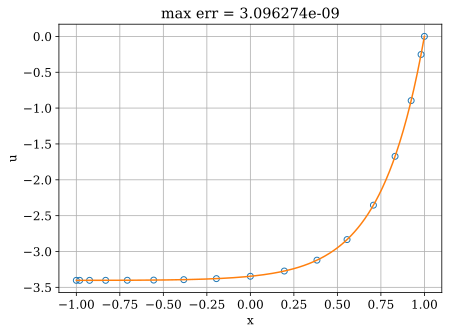

In [10]:
N = 16

# Build matrix
D,x = cheb(N)
D2 = dot(D,D)
D2[0,:] = D[0,:] # First eqn has neumann bc
D2 = D2[0:N,0:N] # Remove last row and column

# RHS
f = zeros(N)
f[1:] = exp(4.0*x[1:N])

# Solve
u = solve(D2,f)
s = zeros(N+1)
s[0:N] = u

# Compute error
xx = linspace(-1.0,1.0,200)
uu = polyval(polyfit(x,s,N),xx)    # interpolate grid data
exact = (exp(4.0*xx) - 4.0*exp(-4.0)*(xx-1.0) - exp(4.0))/16.0
maxerr = norm(uu-exact,inf)

title('max err = %e' % maxerr)
plot(x,s,'o',xx,exact)
xlabel('x'); ylabel('u'); grid(True);